In [ ]:
import os


def run_ppliteseg_whdld_predict(image_path):
    """
    调用PaddleSeg进行语义分割预测，并返回预测结果mask路径。
    
    参数：
    - image_path: str，输入图像路径
    
    返回：
    - mask_path: str，预测结果的mask图像路径
    """
    config = "configs/pp_liteseg/pp_liteseg_whdld_3.yml"
    model_path = "output/pplite_seg_whdld_3/iter_4000_2/model.pdparams"
    save_dir = "output/pplite_seg_whdld_3"
    crop_size = "256 256"
    stride = "128 128"

    # 获取图像文件名
    # img_name = os.path.basename(image_path)
    img_name = os.path.splitext(os.path.basename(image_path))[0] + ".png"
    mask_path = os.path.join(save_dir, "pseudo_color_prediction", img_name)

    # 构造并执行命令
    cmd = f"python tools/predict.py " \
          f"--config {config} " \
          f"--model_path {model_path} " \
          f"--image_path {image_path} " \
          f"--save_dir {save_dir} " \
          f"--crop_size {crop_size} " \
          f"--stride {stride}"

    os.system(cmd)

    return mask_path


def rgb_mask_to_label(mask_path):
    # 读取 RGB 彩色 mask
    mask_rgb = io.imread(mask_path)

    # 初始化 label mask（全 0）
    label_mask = np.zeros((mask_rgb.shape[0], mask_rgb.shape[1]), dtype=np.uint8)

    # 定义映射字典
    rgb_to_label = {
        (0, 0, 128): 0,
        (0, 128, 0): 1,
        (0, 128, 128): 2,
        (128, 0, 0): 3,
        (128, 0, 128): 4,
        (128, 128, 0): 5
    }
    # 定义 RGB → 类别标签映射字典，并标注每种颜色的语义
    rgb_to_label = {
        (0, 0, 128): 0,  # 建筑物（Building），深蓝色
        (0, 128, 0): 1,  # 道路（Road），深绿色
        (0, 128, 128): 2,  # 水体，青绿色 / 湖水绿
        (128, 0, 0): 3,  # 建筑，深红色 / 暗红
        (128, 0, 128): 4,  #  道路 紫红色 / 紫色
        (128, 128, 0): 5  # 裸土  橄榄色 / 黄绿色
    }

    # 对每个 RGB 组合进行匹配替换
    for rgb, label in rgb_to_label.items():
        mask = np.all(mask_rgb == rgb, axis=-1)
        label_mask[mask] = label

    return label_mask


img_path = r"..\photo\4.jpg"
mask_path = run_ppliteseg_whdld_predict(img_path)
print("预测输出 mask 文件路径：", mask_path)
import numpy as np
from skimage import io

label_mask = rgb_mask_to_label(mask_path)

print("标签映射完成，shape:", label_mask.shape)
print("唯一类别值:", np.unique(label_mask))


In [ ]:
io.imshow(label_mask == 2)

In [ ]:
# io.imshow(label_mask)
io.imshow(img_path)


In [ ]:
io.imshow(img_path)

In [ ]:
from skimage import io
import numpy as np


def list_rgb_combinations(mask_path):
    mask_rgb = io.imread(mask_path)  # 读取彩色 mask（H, W, 3）

    # 重塑为 (N, 3) 形式的数组
    pixels = mask_rgb.reshape(-1, 3)

    # 使用 set 去重并排序
    unique_colors = np.unique(pixels, axis=0)

    # 转为 list of tuples
    color_list = [tuple(color) for color in unique_colors]

    return color_list


color_list = list_rgb_combinations(mask_path)

print("图中出现的RGB组合：")
for color in color_list:
    print(color)


In [ ]:
import numpy as np
from skimage import io


def rgb_mask_to_label(mask_path):
    # 读取 RGB 彩色 mask
    mask_rgb = io.imread(mask_path)

    # 初始化 label mask（全 0）
    label_mask = np.zeros((mask_rgb.shape[0], mask_rgb.shape[1]), dtype=np.uint8)

    # 定义映射字典
    rgb_to_label = {
        (0, 0, 128): 0,
        (0, 128, 0): 1,
        (0, 128, 128): 2,
        (128, 0, 0): 3,
        (128, 0, 128): 4,
        (128, 128, 0): 5
    }

    # 对每个 RGB 组合进行匹配替换
    for rgb, label in rgb_to_label.items():
        mask = np.all(mask_rgb == rgb, axis=-1)
        label_mask[mask] = label

    return label_mask


label_mask = rgb_mask_to_label(mask_path)

print("标签映射完成，shape:", label_mask.shape)
print("唯一类别值:", np.unique(label_mask))


In [ ]:
mask_path

In [ ]:
io.imshow(label_mask * 40)

In [ ]:
!python tools/predict.py --config configs/road_seg/pp_liteseg_stdc1_deepglobe_infer.yml --model_path pp_liteseg_stdc1_deepglobe.pdparams --image_path ../photo/4.jpg --save_dir output/test


In [1]:
from infer import infer_seg, infer_single, infer_pplite

test_image = r"../photo/4.jpg"
mask_single = infer_single(test_image)

mask_pplite = infer_pplite(test_image)



[🚀] 正在用 PP-LiteSeg 推理图像：4
['python', 'tools/predict.py', '--config', 'configs/road_seg/pp_liteseg_stdc1_deepglobe_infer.yml', '--model_path', 'pp_liteseg_stdc1_deepglobe.pdparams', '--image_path', '../photo/4.jpg', '--save_dir', 'output/test']
output/test\pseudo_color_prediction\4.png
[✅] 输出文件读取：output/test\pseudo_color_prediction\4.png
[🚀] 正在推理：4
[✅] Mask 成功读取：./output/pplite_seg_whdld_3\pseudo_color_prediction\4.png


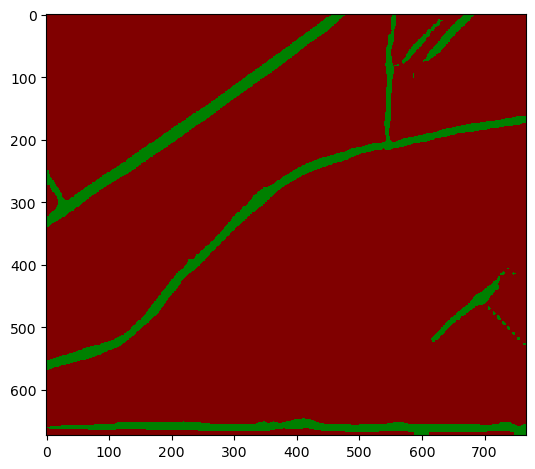

In [7]:
io.imshow(mask_single)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

In [22]:
def binary_from_mask(mask_rgb, threshold=0):
    """
    将 RGB mask 转换为灰度并二值化。
    参数：
        - mask_rgb: RGB 格式的彩色 mask (H, W, 3)
        - threshold: 二值化阈值，默认所有非零像素设为1
    返回：
        - binary_mask: (H, W)，0-1 二值 mask
    """
    # 转为灰度（浮点数，范围0~1）
    gray_mask = color.rgb2gray(mask_rgb)
    # print(np.unique(gray_mask))
    # 二值化
    binary_mask = (gray_mask > min(np.unique(gray_mask))).astype(np.uint8)

    return binary_mask


binary = binary_from_mask(mask_single)
binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

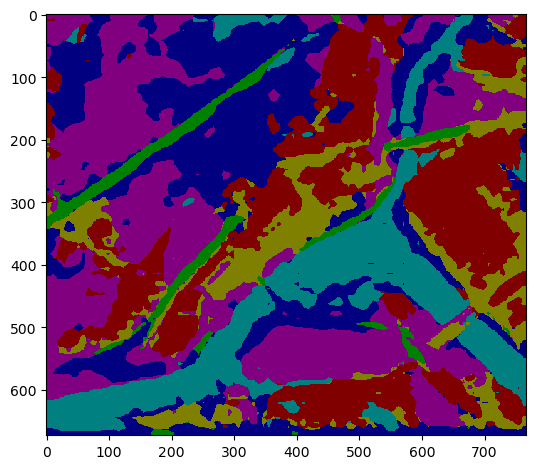

In [2]:
import matplotlib.pyplot as plt
from skimage import io
import os

io.imshow(mask_pplite)

D:\mambaforge\envs\ps_3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


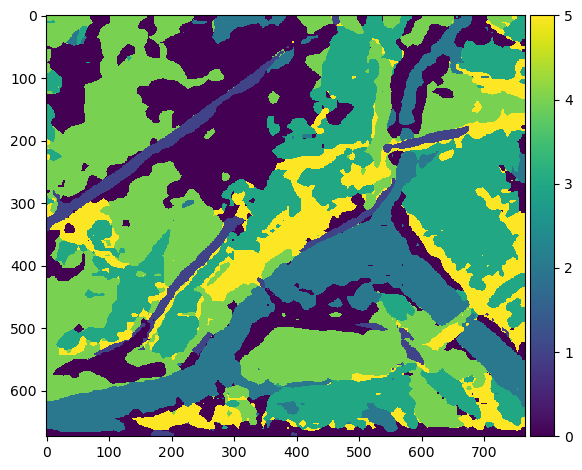

In [5]:
import numpy as np


def rgb_mask_to_label(mask_rgb):
    """
    将 RGB mask（预测输出）映射为 0~5 的 label mask。
    """
    rgb_to_label = {
        (0, 0, 128): 0,  # 建筑物
        (0, 128, 0): 1,  # 道路
        (0, 128, 128): 2,  # 水体
        (128, 0, 0): 3,  # 植被
        (128, 0, 128): 4,  # 紫红（如人行道/特殊地面）
        (128, 128, 0): 5  # 裸土
    }

    h, w, _ = mask_rgb.shape
    label_mask = np.zeros((h, w), dtype=np.uint8)

    for rgb, label in rgb_to_label.items():
        match = np.all(mask_rgb == rgb, axis=-1)
        label_mask[match] = label

    return label_mask


label_mask = rgb_mask_to_label(mask_pplite)

io.imshow(label_mask)


In [6]:
label_mask

array([[4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)